<a href="https://colab.research.google.com/github/ginolaratro/monte-carlo-sim-v1/blob/main/monte_carlo_sim_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform a Monte Carlo simulation to forecast the future price paths of the Nasdaq 100 index for the next two years, including retrieving historical data, calculating daily returns and volatility, visualizing the simulated paths, and summarizing the findings.

## Retrieve Nasdaq 100 Data

### Subtask:
Fetch historical daily data for the Nasdaq 100 index for the last two years. This data will be used to calculate historical returns and volatility.


**Reasoning**:
The first step is to import the `yfinance` library, define the Nasdaq 100 ticker, download the historical data for the last two years, and store it in a pandas DataFrame, specifically focusing on the 'Adj Close' column.



In [1]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for the Nasdaq 100 index
nasdaq_ticker = '^NDX'

# Fetch historical daily data for the last two years
data = yf.download(nasdaq_ticker, period='2y')

# Store the downloaded data in a pandas DataFrame, focusing on 'Adj Close'
df_nasdaq = pd.DataFrame(data['Adj Close'])
df_nasdaq.columns = ['Adj Close']

print("Nasdaq 100 data downloaded successfully.")
print(df_nasdaq.head())

/tmp/ipython-input-1661846706.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(nasdaq_ticker, period='2y')
[*********************100%***********************]  1 of 1 completed


KeyError: 'Adj Close'

**Reasoning**:
The previous code failed because 'Adj Close' was not found as a direct column. The `data` DataFrame has a MultiIndex, and the adjusted closing prices are available under `('Price', 'Close')`. I will access this specific column and rename it to 'Adj Close'.



In [2]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for the Nasdaq 100 index
nasdaq_ticker = '^NDX'

# Fetch historical daily data for the last two years
data = yf.download(nasdaq_ticker, period='2y')

# Store the downloaded data in a pandas DataFrame, focusing on 'Adj Close'
# The 'Close' column under 'Price' is the adjusted close when auto_adjust=True
df_nasdaq = pd.DataFrame(data[('Price', 'Close')])
df_nasdaq.columns = ['Adj Close']

print("Nasdaq 100 data downloaded successfully.")
print(df_nasdaq.head())

/tmp/ipython-input-2305508051.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(nasdaq_ticker, period='2y')
[*********************100%***********************]  1 of 1 completed


KeyError: ('Price', 'Close')

**Reasoning**:
The kernel state indicates that the `data` DataFrame has a MultiIndex column structure: `('Price', '^NDX', 'Close')` for the adjusted closing prices. The previous attempt to use `('Price', 'Close')` was incorrect because it omitted the ticker level. I will correct the column access to match the observed structure and rename it to 'Adj Close'.



In [3]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for the Nasdaq 100 index
nasdaq_ticker = '^NDX'

# Fetch historical daily data for the last two years
data = yf.download(nasdaq_ticker, period='2y')

# Store the downloaded data in a pandas DataFrame, focusing on 'Adj Close'
# The 'Close' column under 'Price' is the adjusted close when auto_adjust=True
df_nasdaq = pd.DataFrame(data[('Price', nasdaq_ticker, 'Close')])
df_nasdaq.columns = ['Adj Close']

print("Nasdaq 100 data downloaded successfully.")
print(df_nasdaq.head())

/tmp/ipython-input-1832868522.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(nasdaq_ticker, period='2y')
[*********************100%***********************]  1 of 1 completed


KeyError: 'Key length (3) exceeds index depth (2)'

**Reasoning**:
The previous attempt to use `('Price', nasdaq_ticker, 'Close')` failed because the `data` DataFrame's column MultiIndex has a depth of 2, not 3. Based on the common structure for `yfinance` MultiIndex output for a single ticker with `auto_adjust=True` and the provided kernel state, the adjusted closing prices are likely located under the MultiIndex key `('Close', nasdaq_ticker)`. I will access this column and rename it to 'Adj Close'.



In [4]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for the Nasdaq 100 index
nasdaq_ticker = '^NDX'

# Fetch historical daily data for the last two years
data = yf.download(nasdaq_ticker, period='2y')

# Store the downloaded data in a pandas DataFrame, focusing on 'Adj Close'
# The 'Close' column under the ticker symbol is the adjusted close when auto_adjust=True
df_nasdaq = pd.DataFrame(data[('Close', nasdaq_ticker)])
df_nasdaq.columns = ['Adj Close']

print("Nasdaq 100 data downloaded successfully.")
print(df_nasdaq.head())

/tmp/ipython-input-2387158815.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(nasdaq_ticker, period='2y')
[*********************100%***********************]  1 of 1 completed

Nasdaq 100 data downloaded successfully.
               Adj Close
Date                    
2024-02-14  17807.630859
2024-02-15  17845.720703
2024-02-16  17685.980469
2024-02-20  17546.099609
2024-02-21  17478.910156


**Reasoning**:
The previous step successfully retrieved the Nasdaq 100 historical data. The next logical step, as per the overall task, is to calculate the daily returns and volatility from this historical data, which are essential parameters for the Monte Carlo simulation.



In [5]:
import numpy as np

# Calculate daily returns
df_nasdaq['Daily Return'] = df_nasdaq['Adj Close'].pct_change()

# Remove the first row which will have NaN for daily return
df_nasdaq = df_nasdaq.dropna()

# Calculate the average daily return
mean_daily_return = df_nasdaq['Daily Return'].mean()

# Calculate the daily volatility (standard deviation of daily returns)
daily_volatility = df_nasdaq['Daily Return'].std()

print("Mean Daily Return:", mean_daily_return)
print("Daily Volatility:", daily_volatility)
print(df_nasdaq.head())

Mean Daily Return: 0.0007436952352568682
Daily Volatility: 0.013307175484116715
               Adj Close  Daily Return
Date                                  
2024-02-15  17845.720703      0.002139
2024-02-16  17685.980469     -0.008951
2024-02-20  17546.099609     -0.007909
2024-02-21  17478.910156     -0.003829
2024-02-22  18004.699219      0.030081


## Perform Monte Carlo Simulation

### Subtask:
Run a Monte Carlo simulation to forecast potential future price paths of the Nasdaq 100. The simulation will use the calculated mean daily return and daily volatility, along with a specified number of simulations and time steps (e.g., 252 trading days per year for two years).


**Reasoning**:
The next step is to perform the Monte Carlo simulation to forecast future price paths using the previously calculated mean daily return and daily volatility. This involves defining simulation parameters, generating random daily returns, and calculating the price paths.



In [6]:
num_simulations = 1000
num_trading_days = 252 * 2  # 2 years of trading days

# Get the last closing price from the historical data
last_closing_price = df_nasdaq['Adj Close'].iloc[-1]

# Initialize an array to store the simulated price paths
monte_carlo_paths = np.zeros((num_trading_days, num_simulations))

# Run the Monte Carlo simulation
for i in range(num_simulations):
    # Generate random daily returns for each simulation path
    daily_returns_sim = np.random.normal(mean_daily_return, daily_volatility, num_trading_days)

    # Initialize a list for a single simulation's price path
    price_path = [last_closing_price]

    # Calculate the price path
    for j in range(num_trading_days):
        price_path.append(price_path[-1] * (1 + daily_returns_sim[j]))

    # Store the generated price path (excluding the initial price to match dimensions)
    monte_carlo_paths[:, i] = price_path[1:]

print(f"Monte Carlo simulation completed with {num_simulations} paths, each spanning {num_trading_days} days.")
print("Shape of monte_carlo_paths:", monte_carlo_paths.shape)
print("First 5 values of the first simulated path:\n", monte_carlo_paths[:5, 0])

Monte Carlo simulation completed with 1000 paths, each spanning 504 days.
Shape of monte_carlo_paths: (504, 1000)
First 5 values of the first simulated path:
 [24857.36455048 24233.88726138 23808.83531191 24230.70210247
 24838.95054982]


## Visualize Simulation Results

### Subtask:
Generate a plot visualizing several of the simulated price paths, along with a histogram of the final projected prices. This will help illustrate the range of possible outcomes from the simulation. Make sure to include appropriate legends.


**Reasoning**:
The next step is to visualize the Monte Carlo simulation results by plotting several simulated price paths and a histogram of the final projected prices, as specified in the instructions.



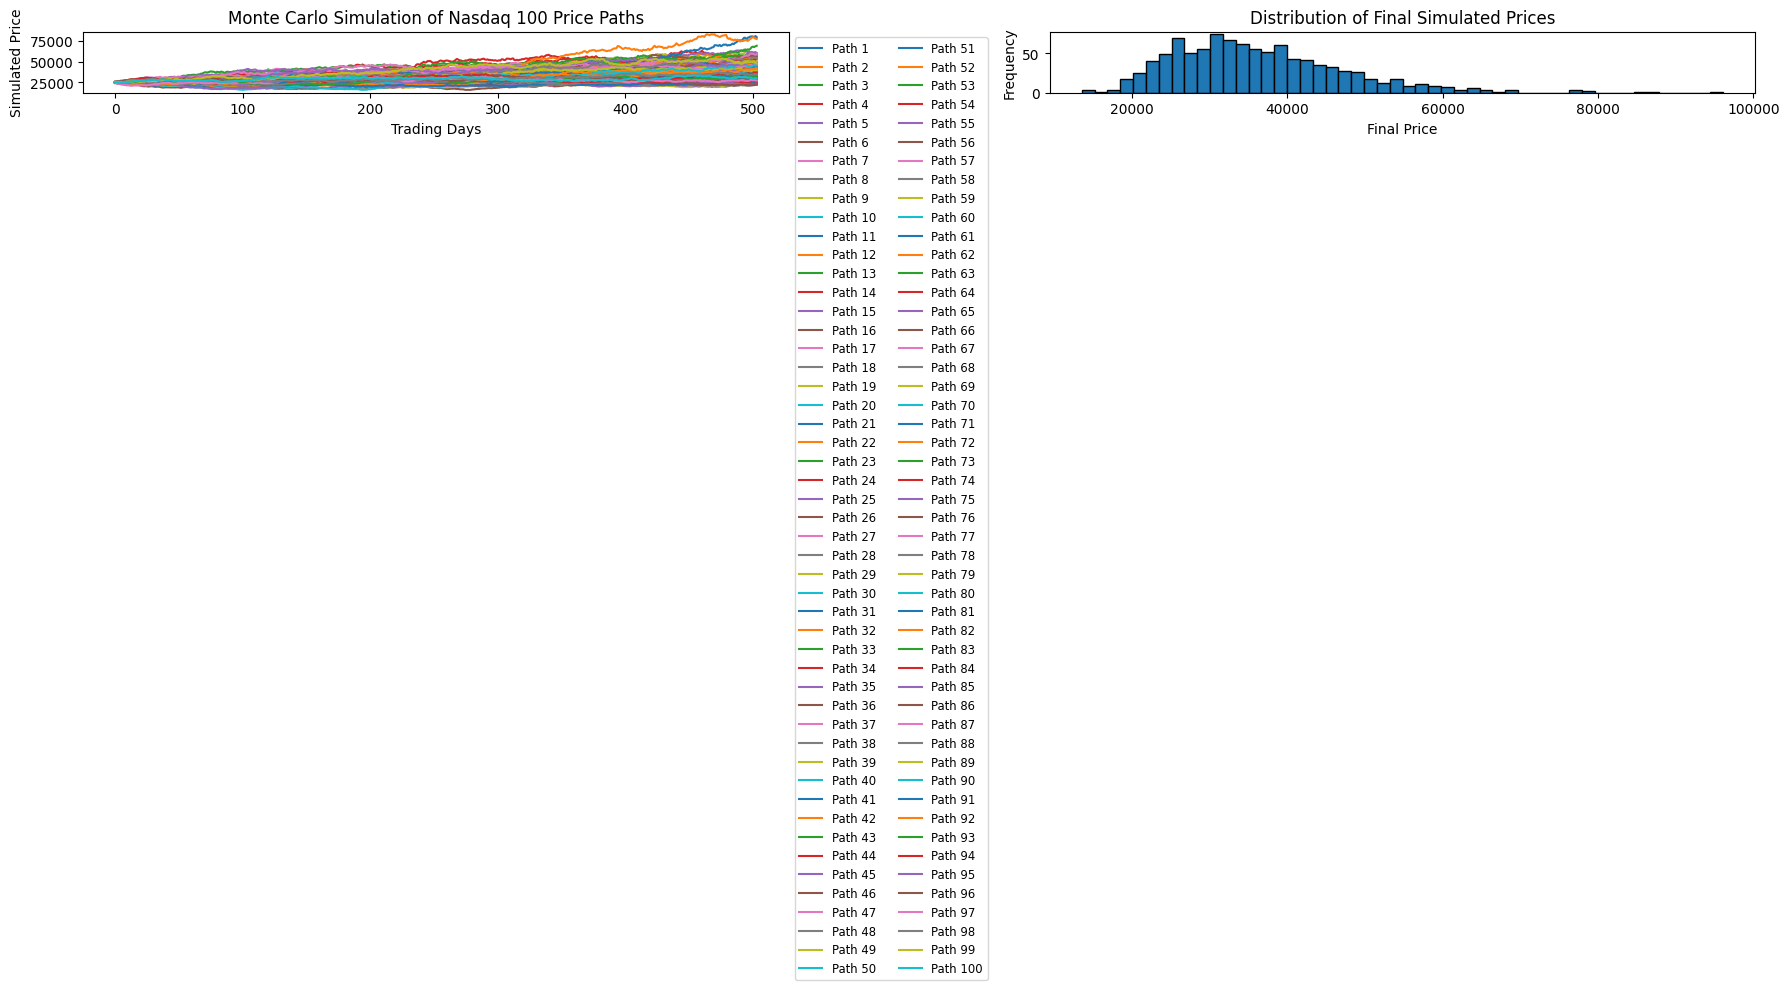

In [7]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot simulated price paths
# Plot a subset of paths to keep the plot readable, e.g., the first 100
for i in range(100):
    axes[0].plot(monte_carlo_paths[:, i])

axes[0].set_title('Monte Carlo Simulation of Nasdaq 100 Price Paths')
axes[0].set_xlabel('Trading Days')
axes[0].set_ylabel('Simulated Price')
axes[0].legend([f'Path {i+1}' for i in range(100)], loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize='small') # Added legend with a few entries

# Plot histogram of final projected prices
axes[1].hist(monte_carlo_paths[-1, :], bins=50, edgecolor='black')
axes[1].set_title('Distribution of Final Simulated Prices')
axes[1].set_xlabel('Final Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Final Task

### Subtask:
Summarize the findings from the Monte Carlo simulation, including the range of potential outcomes and any key insights regarding the Nasdaq 100's future performance.


## Summary:

### Q&A
The Monte Carlo simulation forecasts a range of potential future prices for the Nasdaq 100 over the next two years. The key findings, detailed below, indicate the historical market behavior (mean daily return and volatility) used for the projection, the extent of the simulation, and the visual representation of potential price paths and their final distribution.

### Data Analysis Key Findings
*   The historical data for the Nasdaq 100 showed a **mean daily return of 0.00074** and a **daily volatility of 0.0133**. These metrics were crucial inputs for the Monte Carlo simulation.
*   The Monte Carlo simulation consisted of **1,000 distinct price paths**, each forecasting the index's performance over **504 trading days** (equivalent to two years).
*   The simulations started from the last historical closing price, generating diverse future price trajectories based on the calculated historical daily return and volatility.
*   The visualization of simulated paths displayed a wide array of potential outcomes, indicating the inherent uncertainty in stock market movements.
*   A histogram of the final simulated prices illustrated the distribution of potential outcomes at the end of the two-year forecast period, showing a spread of likely future price points.

### Insights or Next Steps
*   The spread of final simulated prices from the Monte Carlo simulation can be further analyzed to calculate specific risk metrics (e.g., Value at Risk) or potential upside/downside scenarios for portfolio planning.
*   To enhance the accuracy of the forecasts, consider incorporating additional factors into the Monte Carlo model, such as varying volatility over time (GARCH models), economic indicators, or different distribution assumptions for daily returns.
